In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
data = pd.read_excel("../Data/Data Analyst Case Study data set v1.xlsx", sheet_name='Section 1 Data Set')

In [3]:
data.head()

,date,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue
0,2017-01-01,Desktop,Home,1106,147,33,1110
1,2017-01-02,Desktop,Home,1214,181,37,1110
2,2017-01-03,Desktop,Home,1265,189,39,1131
3,2017-01-04,Desktop,Home,1232,185,38,1064
4,2017-01-05,Desktop,Home,1254,188,37,1170


In [4]:
data.date = pd.to_datetime(data.date)

In [5]:
data = data.sort_values(by = 'date')

In [6]:
data.columns = data.columns.map(str.strip)

In [7]:
data['landing_pageviews_prior'] = data.groupby(by=['device', 'landing_page'])['landing_pageviews'].shift(1)

In [8]:
data['traffic_retention'] = data.apply(lambda x: (x.landing_pageviews - x.landing_pageviews_prior) / x.landing_pageviews_prior, axis = 1)

In [9]:
data.groupby(by = 'date')[['landing_pageviews','revenue']].sum().corr()

,landing_pageviews,revenue
landing_pageviews,1.000000,0.641694
revenue,0.641694,1.000000


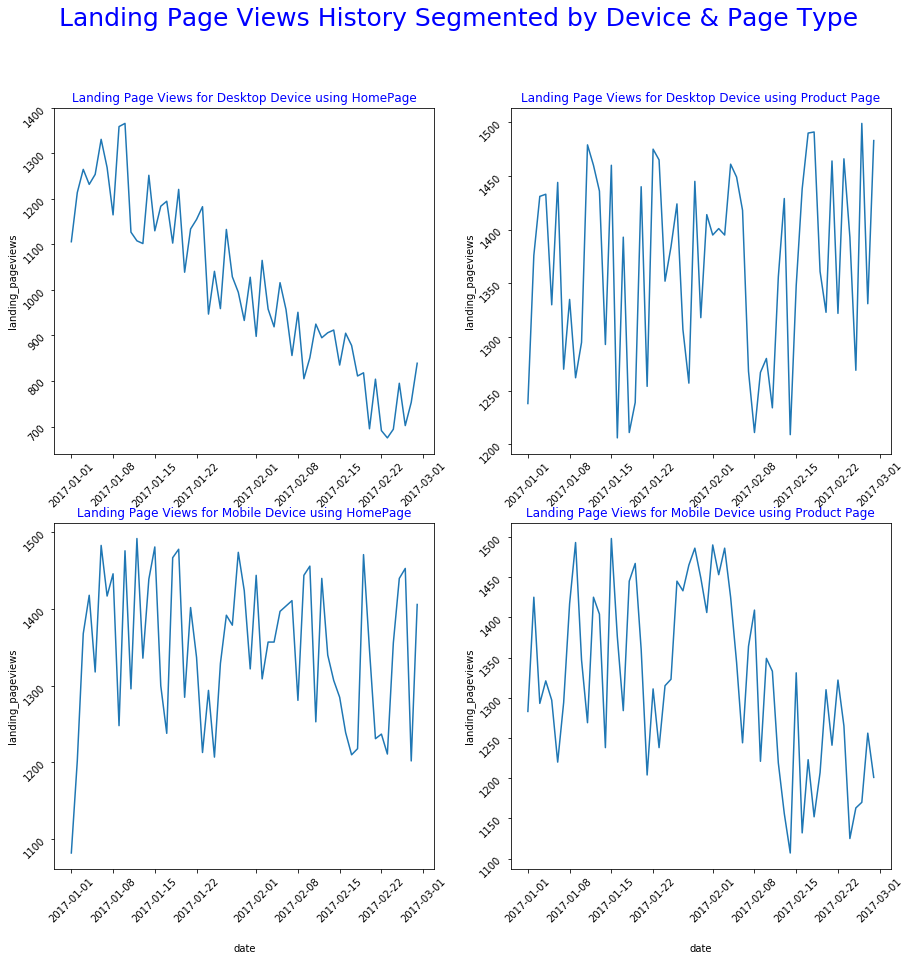

In [10]:
fig, ax = plt.subplots(2,2, figsize = (15,14))
for row, device_type in enumerate(data.device.unique()):
    for column, landing_page in enumerate(data.landing_page.unique()):
        sns.lineplot(x = 'date',
                    y = 'landing_pageviews',
                    data=data.loc[(data.device==device_type)&(data.landing_page==landing_page)],
                    ax = ax[row, column])
        ax[row, column].tick_params(labelrotation=45)
        ax[row, column].xaxis.labelpad = 20

        ax[row, column].set_title("Landing Page Views for {}Device using {}Page".format(device_type,landing_page), color = 'blue')
plt.suptitle("Landing Page Views History Segmented by Device & Page Type", size = 25, color = 'blue')
plt.show()



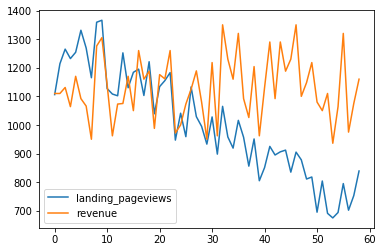

In [11]:
data.loc[(data.device=='Desktop ')&(data.landing_page=='Home')][['landing_pageviews','revenue']].plot()
plt.show()

In [12]:
print("Mean Revenue before 9th Feb for Mobile Devices: ${:.2f}".format(
    data.loc[(data.device=='Mobile ')&(data.date<=dt.datetime(2017,2,9))]['revenue'].mean()))

Mean Revenue before 9th Feb for Mobile Devices: $255.01


In [13]:
print("Mean Revenue after 11th Feb for Mobile Devices: ${:.2f}".format(
    data.loc[(data.device=='Mobile ')&(data.date>=dt.datetime(2017,2,11))]['revenue'].mean()))


Mean Revenue after 11th Feb for Mobile Devices: $138.36
